In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import graphviz
import warnings
warnings.filterwarnings('ignore')


In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv('heart.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nTarget Distribution:")
print(df['target'].value_counts())

Dataset Shape: (1025, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 n

In [5]:
X = df.drop(labels='target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (820, 13)
Test set: (205, 13)


In [6]:
# Train initial decision tree (no depth limit)
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

# Predictions
y_train_pred = dt_full.predict(X_train)
y_test_pred = dt_full.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n1. Full Decision Tree (No Depth Limit)")
print(f"   Training Accuracy: {train_acc:.4f}")
print(f"   Test Accuracy: {test_acc:.4f}")
print(f"   Tree Depth: {dt_full.get_depth()}")
print(f"   Number of Leaves: {dt_full.get_n_leaves()}")
print(f"   Overfitting Gap: {train_acc - test_acc:.4f}")


1. Full Decision Tree (No Depth Limit)
   Training Accuracy: 1.0000
   Test Accuracy: 0.9854
   Tree Depth: 9
   Number of Leaves: 49
   Overfitting Gap: 0.0146



Rendering Full Decision Tree...
✓ Full tree saved as 'decision_tree_full.png'


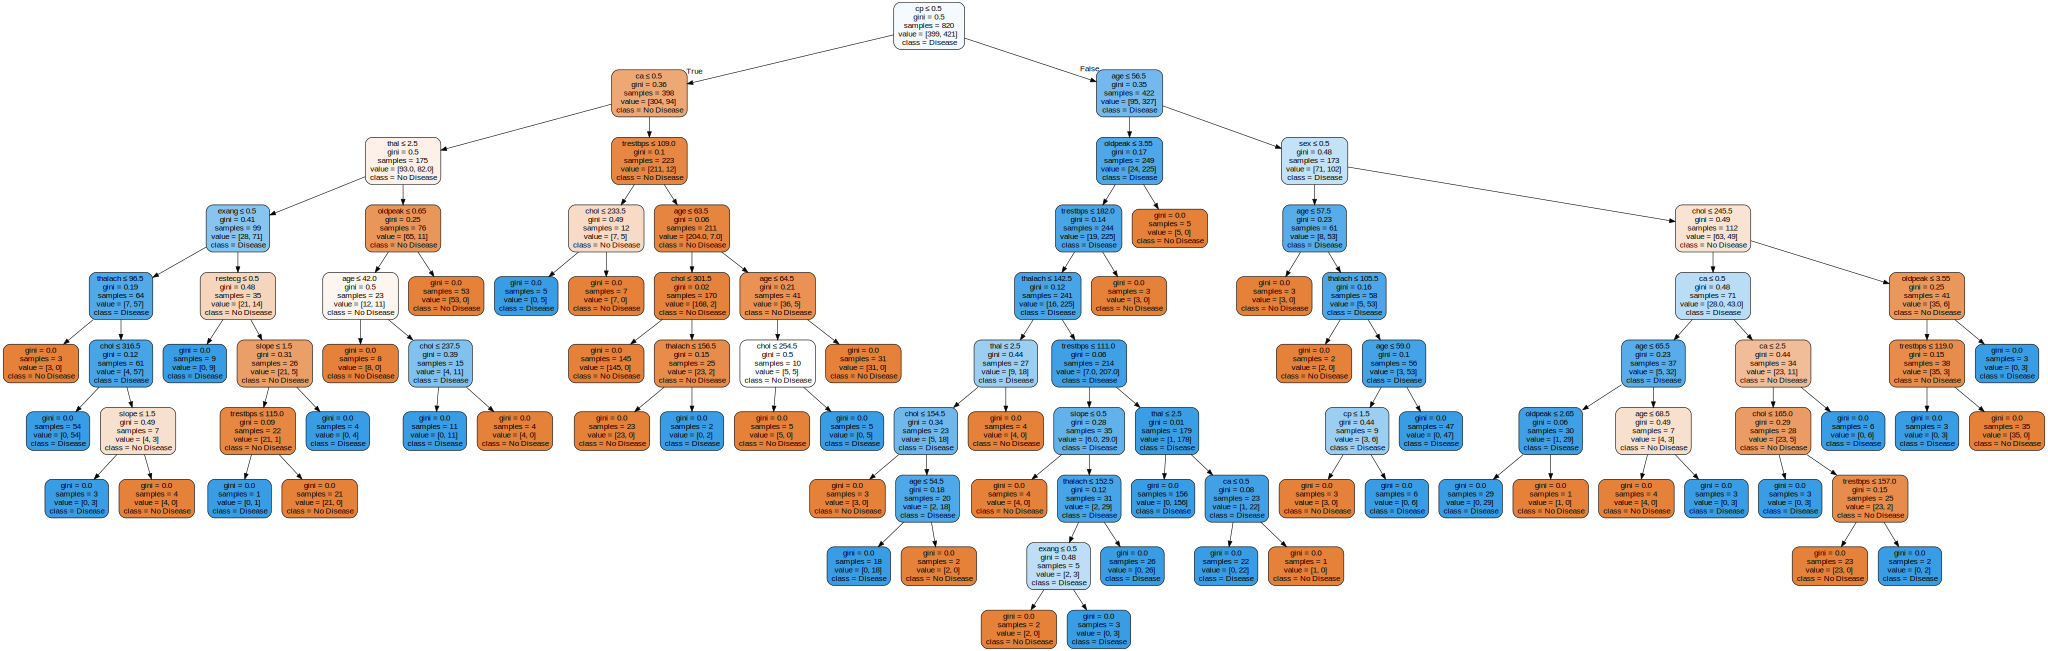


Rendering Simplified Decision Tree (Max Depth = 3)...
✓ Simplified tree saved as 'decision_tree_simple.png'

Simplified Decision Tree (Max Depth = 3) for Better Readability:


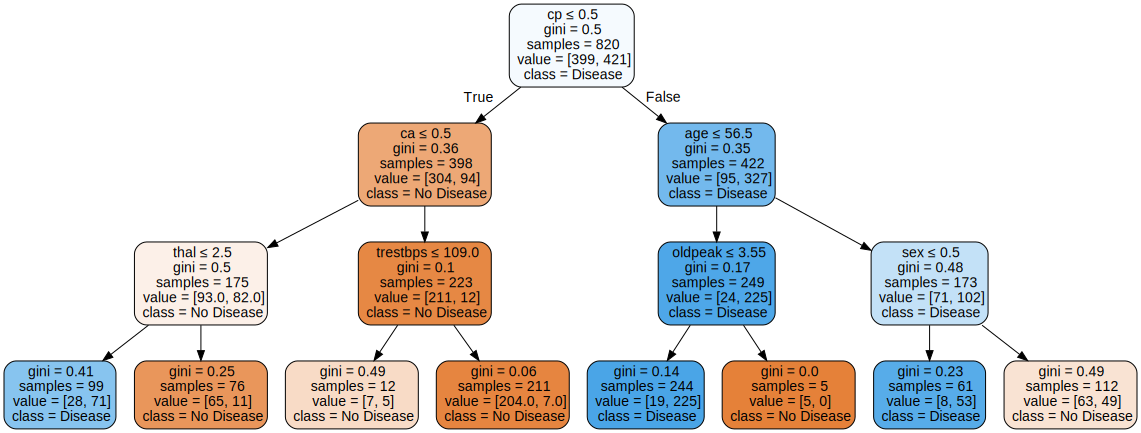


Alternative Matplotlib Visualization:


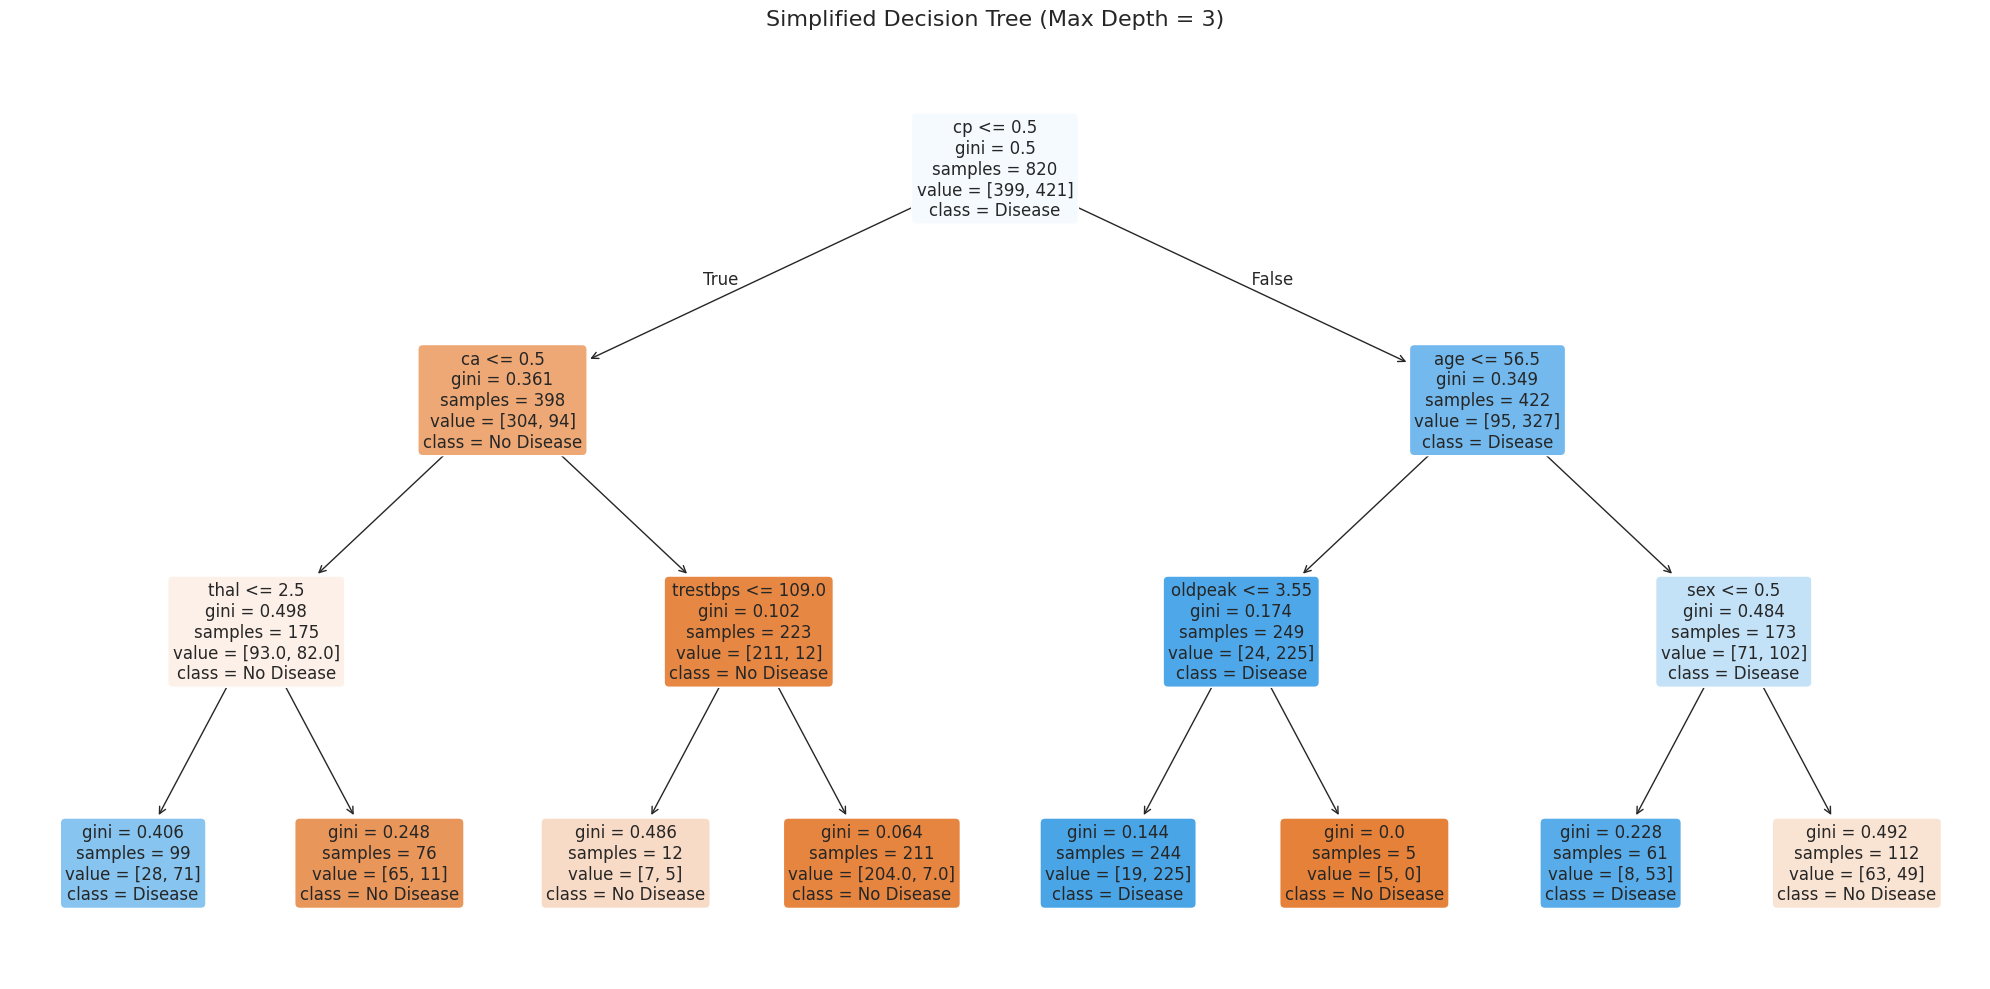

In [7]:
# Export full tree to Graphviz
dot_data_full = export_graphviz(
    dt_full,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=False,
    precision=2
)

# Create Graphviz graph object
graph_full = graphviz.Source(dot_data_full)
print("\nRendering Full Decision Tree...")
graph_full.render('decision_tree_full', format='png', cleanup=True)
print("✓ Full tree saved as 'decision_tree_full.png'")

# Display in notebook
display(graph_full)

# Visualize a simpler tree for clarity (max_depth=3)
dt_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_simple.fit(X_train, y_train)

dot_data_simple = export_graphviz(
    dt_simple,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=False,
    precision=2
)

graph_simple = graphviz.Source(dot_data_simple)
print("\nRendering Simplified Decision Tree (Max Depth = 3)...")
graph_simple.render('decision_tree_simple', format='png', cleanup=True)
print("✓ Simplified tree saved as 'decision_tree_simple.png'")

# Display in notebook
print("\nSimplified Decision Tree (Max Depth = 3) for Better Readability:")
display(graph_simple)

# Also create matplotlib visualization as backup
print("\nAlternative Matplotlib Visualization:")
plt.figure(figsize=(20, 10))
plot_tree(dt_simple,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Simplified Decision Tree (Max Depth = 3)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

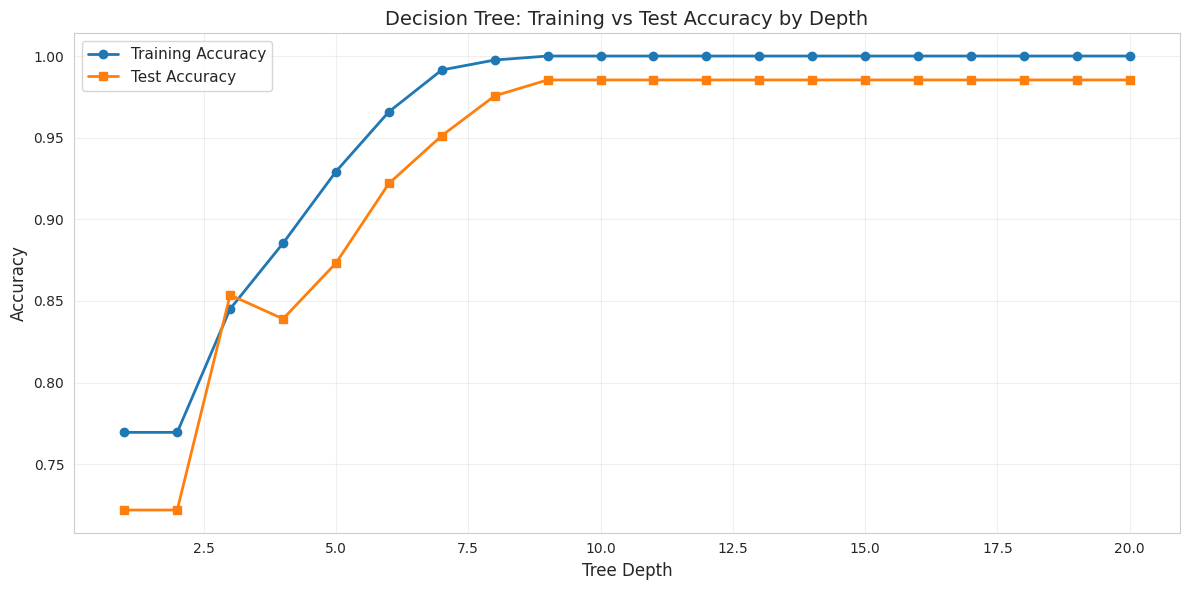


Optimal Tree Depth: 9
Best Test Accuracy: 0.9854

2. Optimized Decision Tree (Max Depth = 9)
   Training Accuracy: 1.0000
   Test Accuracy: 0.9854


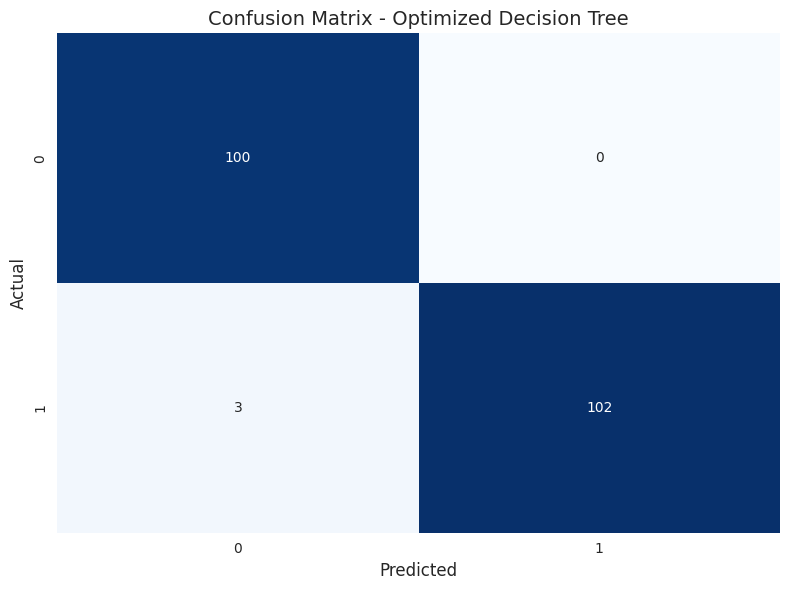


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.97      1.00      0.99       100
     Disease       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [8]:
# Test different max_depths
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

# Plot overfitting analysis
plt.figure(figsize=(12, 6))
plt.plot(depths, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_scores, marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Decision Tree: Training vs Test Accuracy by Depth', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find optimal depth
optimal_idx = np.argmax(test_scores)
optimal_depth = depths[optimal_idx]
print(f"\nOptimal Tree Depth: {optimal_depth}")
print(f"Best Test Accuracy: {test_scores[optimal_idx]:.4f}")

# Train optimized decision tree
dt_optimized = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt_optimized.fit(X_train, y_train)

print(f"\n2. Optimized Decision Tree (Max Depth = {optimal_depth})")
print(f"   Training Accuracy: {dt_optimized.score(X_train, y_train):.4f}")
print(f"   Test Accuracy: {dt_optimized.score(X_test, y_test):.4f}")

# Confusion Matrix
y_pred_opt = dt_optimized.predict(X_test)
cm = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix - Optimized Decision Tree', fontsize=14)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_opt, target_names=['No Disease', 'Disease']))


3. Random Forest (100 trees)
   Training Accuracy: 1.0000
   Test Accuracy: 1.0000
   Overfitting Gap: 0.0000


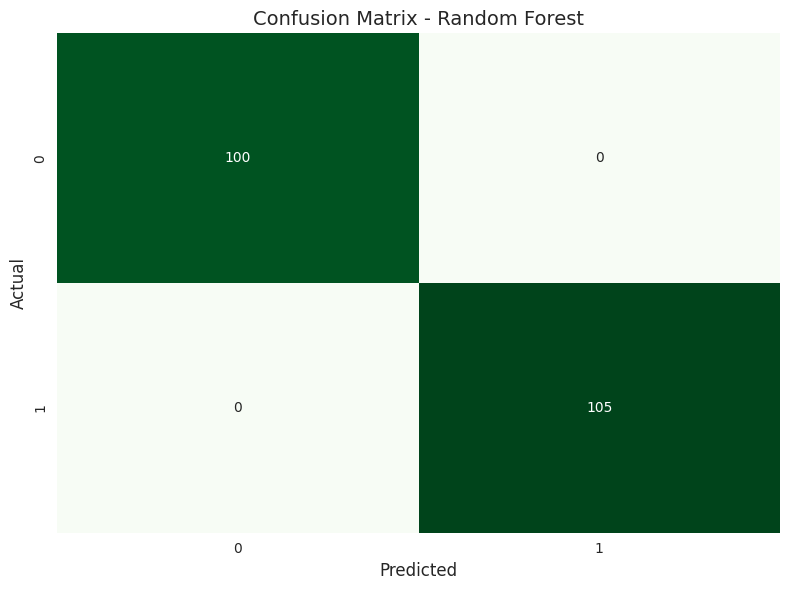


Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       100
     Disease       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [9]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print(f"\n3. Random Forest (100 trees)")
print(f"   Training Accuracy: {rf_train_acc:.4f}")
print(f"   Test Accuracy: {rf_test_acc:.4f}")
print(f"   Overfitting Gap: {rf_train_acc - rf_test_acc:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, rf_test_pred, target_names=['No Disease', 'Disease']))


                   Model  Train Accuracy  Test Accuracy  Overfitting Gap
     Full Decision Tree             1.0       0.985366         0.014634
Optimized Decision Tree             1.0       0.985366         0.014634
          Random Forest             1.0       1.000000         0.000000


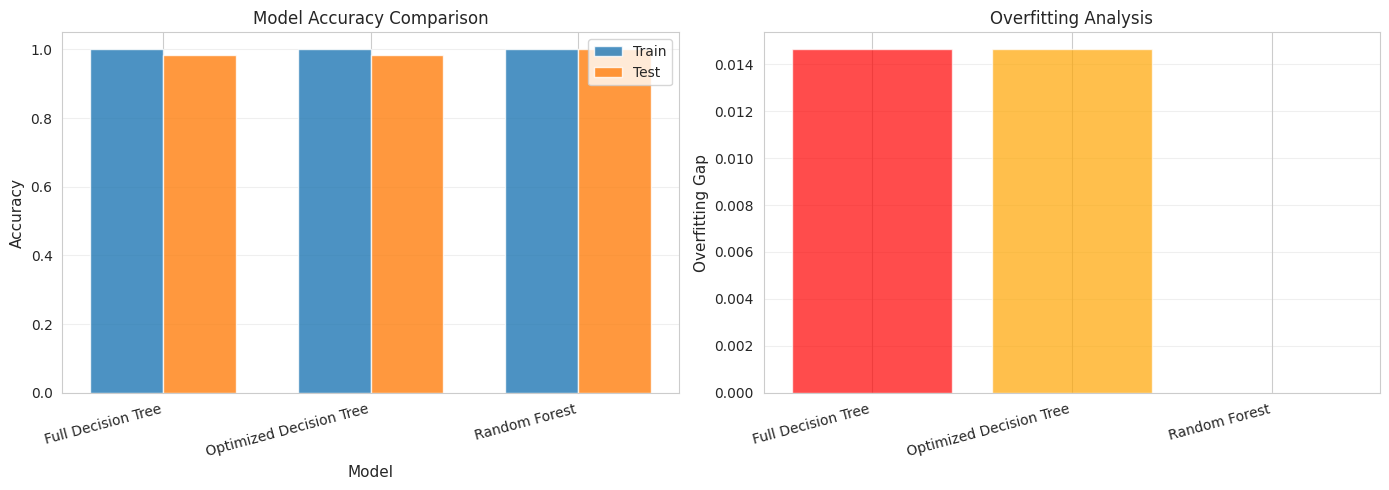

In [10]:
models_comparison = pd.DataFrame({
    'Model': ['Full Decision Tree', 'Optimized Decision Tree', 'Random Forest'],
    'Train Accuracy': [train_acc, dt_optimized.score(X_train, y_train), rf_train_acc],
    'Test Accuracy': [test_acc, dt_optimized.score(X_test, y_test), rf_test_acc],
})
models_comparison['Overfitting Gap'] = models_comparison['Train Accuracy'] - models_comparison['Test Accuracy']

print("\n", models_comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
x_pos = np.arange(len(models_comparison))
width = 0.35

axes[0].bar(x_pos - width/2, models_comparison['Train Accuracy'], width, label='Train', alpha=0.8)
axes[0].bar(x_pos + width/2, models_comparison['Test Accuracy'], width, label='Test', alpha=0.8)
axes[0].set_xlabel('Model', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].set_title('Model Accuracy Comparison', fontsize=12)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models_comparison['Model'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Overfitting gap
axes[1].bar(models_comparison['Model'], models_comparison['Overfitting Gap'],
            color=['red', 'orange', 'green'], alpha=0.7)
axes[1].set_ylabel('Overfitting Gap', fontsize=11)
axes[1].set_title('Overfitting Analysis', fontsize=12)
axes[1].set_xticklabels(models_comparison['Model'], rotation=15, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



Decision Tree Feature Importances:
 Feature  Importance
      cp    0.299922
      ca    0.128631
     age    0.114920
    chol    0.099451
    thal    0.079146
 oldpeak    0.054481
trestbps    0.051820
 thalach    0.043466
   slope    0.038558
     sex    0.035869
   exang    0.032445
 restecg    0.021291
     fbs    0.000000

Random Forest Feature Importances:
 Feature  Importance
      cp    0.142094
 thalach    0.117349
      ca    0.114844
 oldpeak    0.112634
    thal    0.095930
     age    0.091285
    chol    0.077771
   exang    0.073707
trestbps    0.067765
   slope    0.048711
     sex    0.026682
 restecg    0.020438
     fbs    0.010790


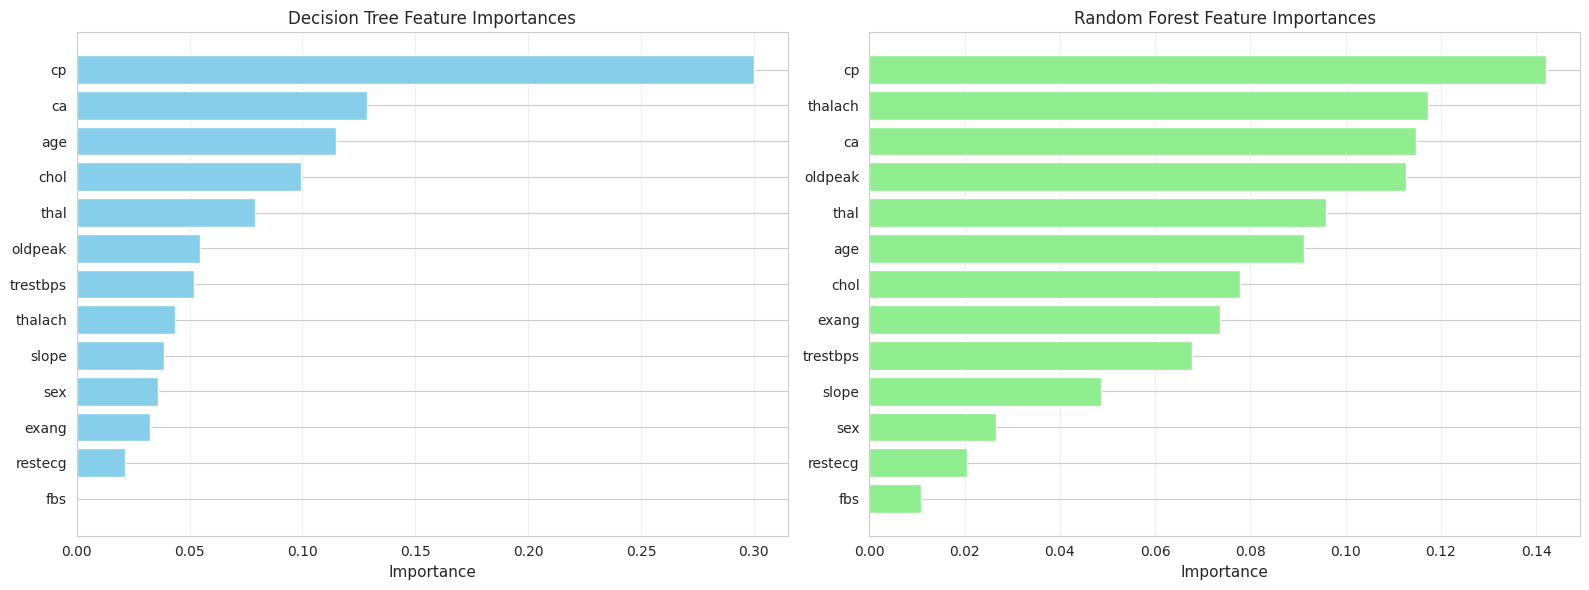

In [11]:
# Decision Tree Feature Importances
dt_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nDecision Tree Feature Importances:")
print(dt_importances.to_string(index=False))

# Random Forest Feature Importances
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(rf_importances.to_string(index=False))

# Visualize feature importances
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree
axes[0].barh(dt_importances['Feature'], dt_importances['Importance'], color='skyblue')
axes[0].set_xlabel('Importance', fontsize=11)
axes[0].set_title('Decision Tree Feature Importances', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Random Forest
axes[1].barh(rf_importances['Feature'], rf_importances['Importance'], color='lightgreen')
axes[1].set_xlabel('Importance', fontsize=11)
axes[1].set_title('Random Forest Feature Importances', fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


Performing 5-Fold Cross-Validation...

Decision Tree CV Scores: [1.        1.        1.        0.9902439 1.       ]
Mean Accuracy: 0.9980 (+/- 0.0078)

Random Forest CV Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9971 (+/- 0.0117)


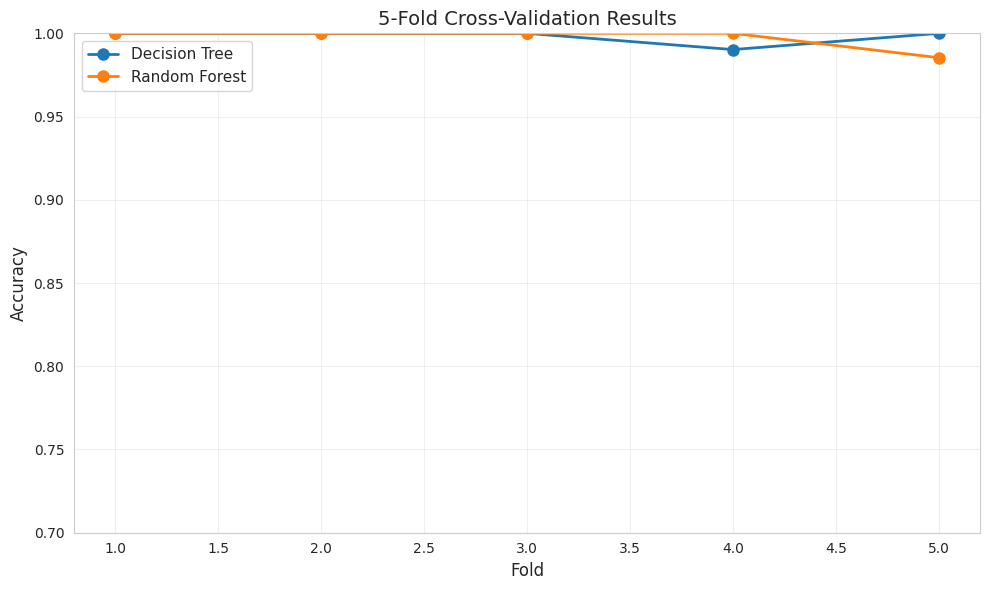

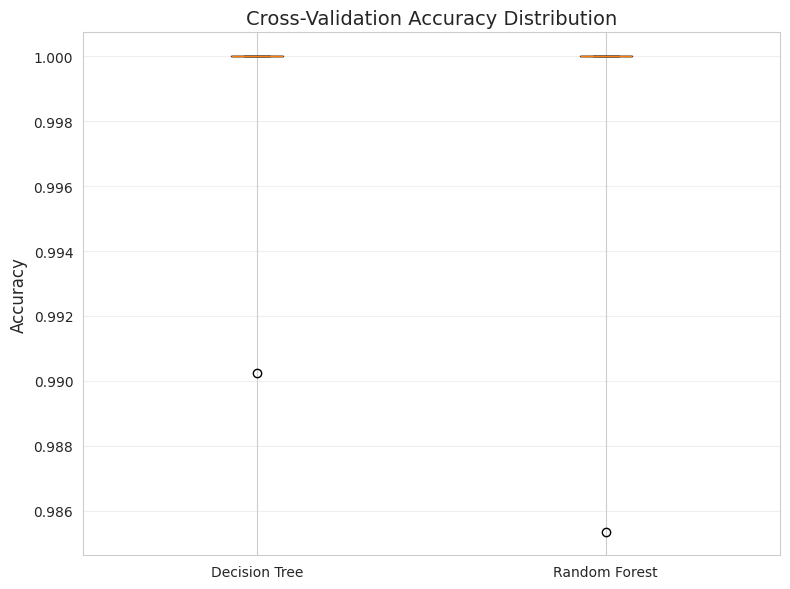

In [12]:
# Perform 5-fold cross-validation
cv_folds = 5

print(f"\nPerforming {cv_folds}-Fold Cross-Validation...\n")

# Decision Tree CV
dt_cv_scores = cross_val_score(dt_optimized, X, y, cv=cv_folds, scoring='accuracy')
print(f"Decision Tree CV Scores: {dt_cv_scores}")
print(f"Mean Accuracy: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})")

# Random Forest CV
rf_cv_scores = cross_val_score(rf, X, y, cv=cv_folds, scoring='accuracy')
print(f"\nRandom Forest CV Scores: {rf_cv_scores}")
print(f"Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

# Visualize CV results
plt.figure(figsize=(10, 6))
cv_results = pd.DataFrame({
    'Fold': list(range(1, cv_folds+1)) * 2,
    'Accuracy': list(dt_cv_scores) + list(rf_cv_scores),
    'Model': ['Decision Tree']*cv_folds + ['Random Forest']*cv_folds
})

for model in ['Decision Tree', 'Random Forest']:
    model_data = cv_results[cv_results['Model'] == model]
    plt.plot(model_data['Fold'], model_data['Accuracy'],
             marker='o', linewidth=2, markersize=8, label=model)

plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title(f'{cv_folds}-Fold Cross-Validation Results', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0.7, 1.0])
plt.tight_layout()
plt.show()

# Box plot comparison
plt.figure(figsize=(8, 6))
plt.boxplot([dt_cv_scores, rf_cv_scores], labels=['Decision Tree', 'Random Forest'])
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation Accuracy Distribution', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [14]:
#Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
print("\nPerforming Grid Search...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

# Evaluate best model
best_rf = grid_search.best_estimator_
best_rf_test_acc = best_rf.score(X_test, y_test)
print(f"Test Accuracy (Best RF): {best_rf_test_acc:.4f}")


Performing Grid Search...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.9854
Test Accuracy (Best RF): 1.0000


In [15]:
print(f"""
Key Findings:
-------------
1. Full Decision Tree showed overfitting (Train: {train_acc:.4f}, Test: {test_acc:.4f})
2. Optimal tree depth found: {optimal_depth}
3. Random Forest reduced overfitting and improved generalization
4. Random Forest test accuracy: {rf_test_acc:.4f}
5. Most important features (Random Forest): {rf_importances['Feature'].iloc[0]}, {rf_importances['Feature'].iloc[1]}, {rf_importances['Feature'].iloc[2]}
6. Cross-validation confirmed model stability
7. Tuned Random Forest achieved: {best_rf_test_acc:.4f} test accuracy
""")


Key Findings:
-------------
1. Full Decision Tree showed overfitting (Train: 1.0000, Test: 0.9854)
2. Optimal tree depth found: 9
3. Random Forest reduced overfitting and improved generalization
4. Random Forest test accuracy: 1.0000
5. Most important features (Random Forest): cp, thalach, ca
6. Cross-validation confirmed model stability
7. Tuned Random Forest achieved: 1.0000 test accuracy

